In [2]:
from PYME.localization.FitFactories import DumbellFitR as dbfr
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import fmin

float64
float64


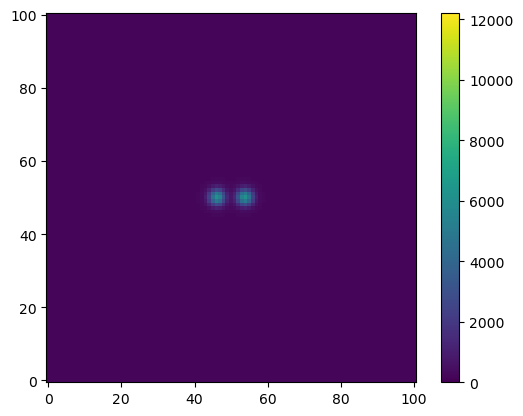

Optimization terminated successfully.
         Current function value: -715.953692
         Iterations: 20
         Function evaluations: 40
5.662825160375844
715.9536916221178


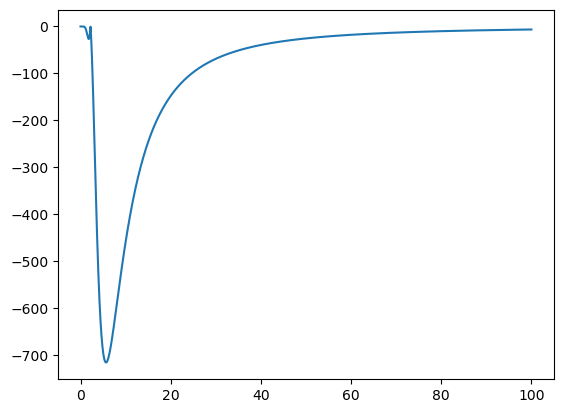

In [15]:
roiHalfSize = 50 # [pixels]

xx = np.mgrid[(-roiHalfSize):(roiHalfSize + 1)]
yy = np.mgrid[(-roiHalfSize):(roiHalfSize + 1)]


X, Y = xx[:, None], yy[None, :]

# DHPSF Model
angle = np.pi*(0/16)
A = 6000
l = 900/117.4
s = 180/117.4
bg = 225

dh = A*np.exp(-((X + np.sin(angle)*(l/2))**2 + (Y + np.cos(angle)*(l/2))**2)/(2*s**2)) + A*np.exp(-((X - np.sin(angle)*(l/2))**2 + (Y - np.cos(angle)*(l/2))**2)/(2*s**2)) + bg 
print(dh.dtype)
dh = dh.astype(float)
print(dh.dtype)

# dh = A*np.exp(-((X)**2 + (Y)**2)/(2*s**2)) + bg 
# print(dh.dtype)
# dh = dh.astype(float)
# print(dh.dtype)

plt.figure()
plt.imshow(dh, origin="lower", vmin=0, vmax=bg+2*A)
plt.colorbar()
plt.show()

# Solve for optimal filter sigma
A=1
S = lambda x: -pow(2.718281828459045,3)*pow(3.141592653589793,3)*pow(pow(A,4)*pow(s,8)*pow(x,16)*pow((pow(s,2)+pow(x,2)),-6)*pow((-1*pow(2.718281828459045,-0.25*pow((pow(s,2)+pow(x,2)),-1))*pow((math.erf(0.5*(-1+l)*pow(2,-0.5)*pow((pow(s,2)+pow(x,2)),-0.5))+-1*math.erf(0.5*(1+l)*pow(2,-0.5)*pow((pow(s,2)+pow(x,2)),-0.5))),2)+pow(2.718281828459045,-0.25*pow((1+l),2)*pow((pow(s,2)+pow(x,2)),-1))*pow(math.erf(0.5*pow(2,-0.5)*pow((pow(s,2)+pow(x,2)),-0.5)),2)*pow((1+l+-1*(-1+l)*pow(2.718281828459045,0.5*l*pow((pow(s,2)+pow(x,2)),-1))),2)),2),0.5)

sigmaUB = 100
sigs = np.array(range(0,sigmaUB*100,1), dtype=float)/100
SValues = np.array(list(map(S, sigs)), dtype=float)
plt.plot(sigs, SValues)

sigma=fmin(S,2*l)[0]
# sigma=8.2
print(sigma)

normFactor = -S(sigma)
print(normFactor)

In [16]:
# see G:\Shared drives\WEMpire-LAB\Current_projects\CellImaging-NIH\PYME-DH-fitting\20240404_2ndDerivative_Gaussian_Basis_Filters.nb

def ka(theta):
    return np.cos(theta)**2
def kb(theta):
    return -2 * np.cos(theta) * np.sin(theta)
def kc(theta):
    return np.sin(theta)**2

def g2a(x, y, sig):
    return (1 / (2 * sig**2)) * np.exp((3/2)) * (x**2 - sig**2) * np.exp(-(x**2 + y**2) / (2 * sig**2))
def g2b(x, y, sig):
    return (1 / (2 * sig**2)) * np.exp((3/2)) * x*y*np.exp(-(x**2 + y**2) / (2 * sig**2))
def g2c(x, y, sig):
    return (1 / (2 * sig**2)) * np.exp((3/2)) * (y**2 - sig**2) * np.exp(-(x**2 + y**2) / (2 * sig**2))


In [17]:
f1 = g2a(Y, X, sigma)
# plt.figure()
# plt.imshow(f1, origin="lower")
# plt.colorbar()

f2 = g2b(Y, X, sigma)
# plt.figure()
# plt.imshow(f2, origin="lower")
# plt.colorbar()


f3 = g2c(Y, X, sigma)
# plt.figure()
# plt.imshow(f3, origin="lower")
# plt.colorbar()

In [18]:
from scipy import ndimage
c1 = ndimage.convolve(dh, f1)
# plt.figure()
# plt.imshow(c1, origin="lower")
# plt.colorbar()

c2 = ndimage.convolve(dh, f2)
# plt.figure()
# plt.imshow(c2, origin="lower")

c3 = ndimage.convolve(dh, f3)
# plt.figure()
# plt.imshow(c3, origin="lower")

In [19]:
# see G:\Shared drives\WEMpire-LAB\Current_projects\CellImaging-NIH\PYME-DH-fitting\20240325_Hilbert_Transform_Approximation.nb

def h2a(x, y, sig):
    return (np.exp((3/2)) / (24 * np.pi * sig**3)) * np.exp(-(x**2 + y**2) / (2 * sig**2)) * (4 * (2 * np.pi)**(1/2) * x**3 - 3 * sig * (8 * (2 * np.pi)**(1/2) * sig - (np.log(1/sig**2) + np.log(sig**2))) * x)
def h2b(x, y, sig):
    return (np.exp((3/2)) / (24 * np.pi * sig**3)) * np.exp(-(x**2 + y**2) / (2 * sig**2)) * (4 * (2 * np.pi)**(1/2) * x**2 - sig * (8 * (2 * np.pi)**(1/2) * sig - (np.log(1/sig**2) + np.log(sig**2)))) * y
def h2c(x, y, sig):
    return (np.exp((3/2)) / (24 * np.pi * sig**3)) * np.exp(-(x**2 + y**2) / (2 * sig**2)) * (4 * (2 * np.pi)**(1/2) * y**2 - sig * (8 * (2 * np.pi)**(1/2) * sig - (np.log(1/sig**2) + np.log(sig**2)))) * x
def h2d(x, y, sig):
    return (np.exp((3/2)) / (24 * np.pi * sig**3)) * np.exp(-(x**2 + y**2) / (2 * sig**2)) * (4 * (2 * np.pi)**(1/2) * y**3 - 3 * sig * (8 * (2 * np.pi)**(1/2) * sig - (np.log(1/sig**2) + np.log(sig**2))) * y)

# def h2a(x, y, sig):
#     return (np.exp((3/2)) / (24 * np.pi * sig**3)) * np.exp(- (x**2 + y**2) / (2 * sig**2)) * (4 * (2 * np.pi)**(1/2) * x**3 - 3 * sig * (8 * (2 * np.pi)**(1/2) * sig - (np.log(1/sig**2) + np.log(sig**2))) * x)
# def h2b(x, y, sig):
#     return h2a(x*np.cos(-np.pi/4) - y*np.sin(-np.pi/4), y*np.cos(-np.pi/4) + x*np.sin(-np.pi/4), sig)
# def h2c(x, y, sig):
#     return h2a(x*np.cos(-np.pi/2) - y*np.sin(-np.pi/2), y*np.cos(-np.pi/2) + x*np.sin(-np.pi/2), sig)
# def h2d(x, y, sig): 
#     return h2a(x*np.cos(-3*np.pi/4) - y*np.sin(-3*np.pi/4), y*np.cos(-3*np.pi/4) + x*np.sin(-3*np.pi/4), sig)

def kha(theta):
    return np.cos(theta)**3
def khb(theta):
    return - 3 * np.cos(theta)**2 * np.sin(theta)
def khc(theta):
    return 3 * np.cos(theta) * np.sin(theta) ** 2
def khd(theta):
    return - np.sin(theta)**3


In [20]:
fha = h2a(Y, X, sigma)
# plt.figure()
# plt.imshow(fha, origin="lower")
# plt.colorbar()

fhb = h2b(Y, X, sigma)
# plt.figure()
# plt.imshow(fhb, origin="lower")
# plt.colorbar()

fhc = h2c(Y, X, sigma)
# plt.figure()
# plt.imshow(fhc, origin="lower")
# plt.colorbar()

fhd = h2d(Y, X, sigma)
# plt.figure()
# plt.imshow(fhd, origin="lower")
# plt.colorbar()

In [21]:
cha = ndimage.convolve(dh, fha)
# plt.figure()
# plt.imshow(cha, origin="lower")
# plt.colorbar()
# plt.show()

chb = ndimage.convolve(dh, fhb)
# plt.figure()
# plt.imshow(chb, origin="lower")
# plt.colorbar()
# plt.show()

chc = ndimage.convolve(dh, fhc)
# plt.figure()
# plt.imshow(chc, origin="lower")
# plt.colorbar()
# plt.show()

chd = ndimage.convolve(dh, fhd)
# plt.figure()
# plt.imshow(chd, origin="lower")
# plt.colorbar()
# plt.show()


In [22]:
g2a_xy = c1
g2b_xy = c2
g2c_xy = c3

h2a_xy = cha
h2b_xy = chb
h2c_xy = chc
h2d_xy = chd

c_2= 0.5 * (g2a_xy**2 - g2c_xy**2) \
            + 0.46875*(h2a_xy**2 - h2d_xy**2) \
            + 0.28125*(h2b_xy**2 - h2c_xy**2) \
            + 0.1875 * (h2a_xy*h2c_xy - h2b_xy * h2d_xy)
c_3 = - g2a_xy*g2b_xy - g2b_xy * g2c_xy \
            - 0.9375 * (h2c_xy * h2d_xy + h2a_xy * h2b_xy) \
            - 1.6875 * h2b_xy * h2c_xy - 0.1875 * h2a_xy * h2d_xy

# plt.figure()
# plt.imshow(c_2, origin="lower")
# plt.colorbar()

# plt.figure()
# plt.imshow(c_3, origin="lower")
# plt.colorbar()

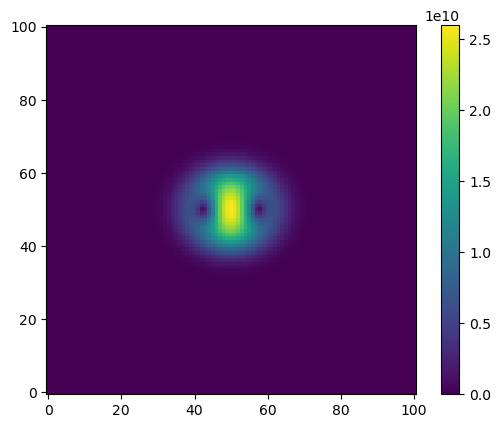

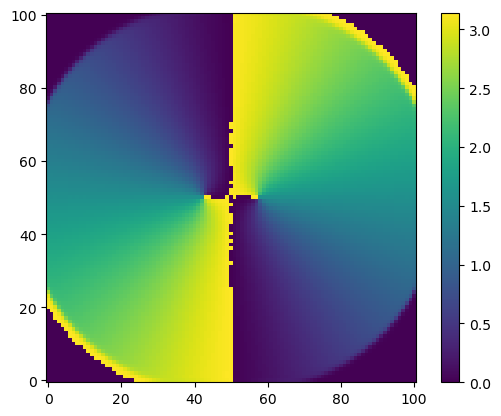

In [23]:
def s(c_2, c_3):
    return np.sqrt(c_2 ** 2 + c_3 ** 2)

def sNorm(c_2, c_3):
    return np.sqrt(np.sqrt(c_2 ** 2 + c_3 ** 2)/normFactor)
plt.figure()
plt.imshow(s(c_2, c_3), origin="lower")
plt.colorbar()
plt.show()

def theta_d(c_2, c_3):
    # note reversal of x, y for arg in numpy
    ret = np.arctan2(c_3, c_2) / 2
    return ret

plt.figure()
plt.imshow((np.pi/2) - theta_d(c_2, c_3), origin="lower")
plt.colorbar()
plt.show()

In [12]:
print("Max Strength PX = " + str(np.unravel_index(np.argmax(s(c_2, c_3)), s(c_2, c_3).shape)))
print("DH Amplitude = " + str(np.max(dh - bg)))
print("Max Strength = " + str(np.max(s(c_2, c_3))))
print("Ground Truth Angle = " + str(round(angle, 3)))
print("estimated angle = " + str(round((np.pi/2) - theta_d(c_2, c_3)[np.unravel_index(np.argmax(s(c_2, c_3)), s(c_2, c_3).shape)], 3)))

Max Strength PX = (43, 52)
DH Amplitude = 6000.0
Max Strength = 4776219185.583575
Ground Truth Angle = 0.0
estimated angle = 0.278


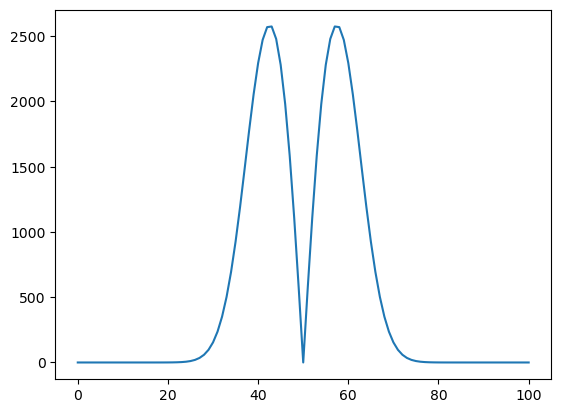

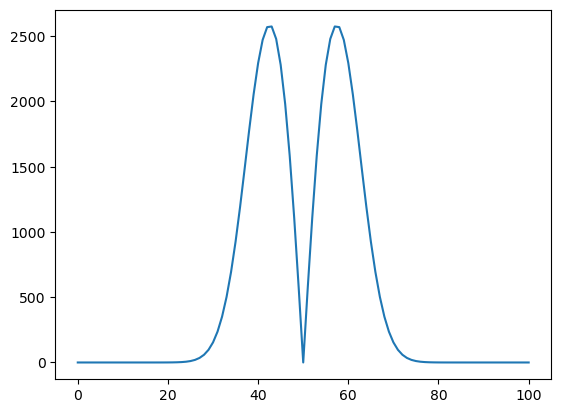

In [13]:
plt.figure()
plt.plot(range(0,101,1), sNorm(c_2,c_3)[:,50])
plt.figure()
plt.plot(range(0,101,1), sNorm(c_2,c_3)[50,:])

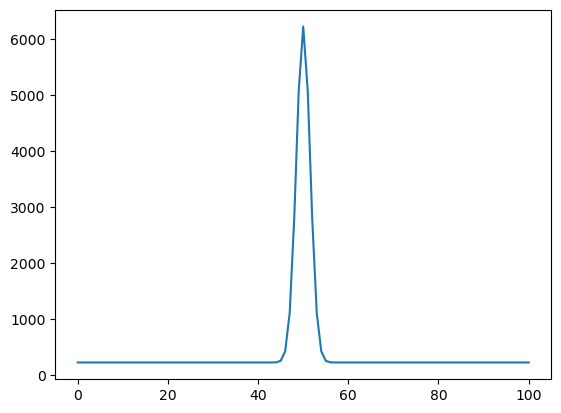

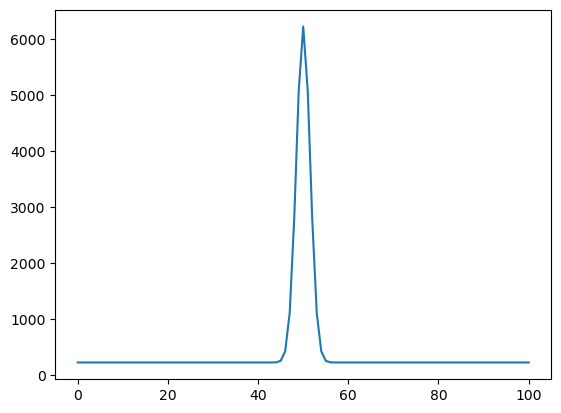

In [14]:
plt.figure()
plt.plot(range(0,101,1), dh[:,50])
plt.figure()
plt.plot(range(0,101,1), dh[50,:])